In [161]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px


In [162]:
!pip3 install plotly


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [163]:
df = pd.read_csv("nobel_prize_data.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [164]:
df.shape

(962, 16)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
year                     962 non-null int64
category                 962 non-null object
prize                    962 non-null object
motivation               874 non-null object
prize_share              962 non-null object
laureate_type            962 non-null object
full_name                962 non-null object
birth_date               934 non-null object
birth_city               931 non-null object
birth_country            934 non-null object
birth_country_current    934 non-null object
sex                      934 non-null object
organization_name        707 non-null object
organization_city        707 non-null object
organization_country     708 non-null object
ISO                      934 non-null object
dtypes: int64(1), object(15)
memory usage: 120.3+ KB


In [166]:
#Change year to datetime format
#df['year'] = pd.to_datetime(df['year'])


In [167]:
#In which year was the Nobel prize first awarded?
df.describe()
#first: 1901
#lastest: 2020

,year
count,962.000000
mean,1971.816008
std,33.813537
min,1901.000000
25%,1948.000000
50%,1977.000000
75%,2001.000000
max,2020.000000


In [168]:
df.duplicated().value_counts()
#There is no duplicated values

False    962
dtype: int64

In [169]:
df.isnull().sum()/len(df)*100

year                      0.000000
category                  0.000000
prize                     0.000000
motivation                9.147609
prize_share               0.000000
laureate_type             0.000000
full_name                 0.000000
birth_date                2.910603
birth_city                3.222453
birth_country             2.910603
birth_country_current     2.910603
sex                       2.910603
organization_name        26.507277
organization_city        26.507277
organization_country     26.403326
ISO                       2.910603
dtype: float64

In [170]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df.loc[df.birth_date.isna()][col_subset].head()


,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN


In [171]:
df['organization_name'] = df.apply(lambda row: row['full_name'] if row['laureate_type'] == "Organization" and pd.isna(row['organization_name']) else row['organization_name'], axis=1)


In [172]:
df['organization_name'] = df.apply(lambda row: "Not affiliated" if row['laureate_type'] == "Individual" and pd.isna(row['organization_name']) else row['organization_name'], axis=1)

In [173]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df.loc[df.organization_name.isna()][col_subset].head()

,year,category,laureate_type,full_name,organization_name


In [174]:
#Add a Column called share_pct which has the laureates' share as a percentage in the form of a floating-point number.
separated_values = df.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df['share_pct'] = numerator / denomenator

In [175]:
df.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name          0
organization_city        255
organization_country     254
ISO                       28
share_pct                  0
dtype: int64

In [176]:
cols = ['motivation','birth_city','birth_country', 'birth_country_current', 'organization_city', 'organization_country', 'ISO']
df[cols] = df[cols].apply(lambda row: "Not Available" if df.loc[row.name, "laureate_type"] == "Organization" and pd.isna(row).any() else row, axis=1)
#change nan values to not available

In [177]:
cols = ['organization_city','organization_country','motivation']
df[cols] = df[cols].apply(lambda row: "Not Available" if df.loc[row.name, "laureate_type"] == "Individual" and pd.isna(row).any() else row, axis=1)
#change nan values to not available

In [178]:
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
1,1901,Literature,The Nobel Prize in Literature 1901,Not Available,1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,Not affiliated,Not Available,Not Available,FRA,1.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0
3,1901,Peace,The Nobel Peace Prize 1901,Not Available,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,Not affiliated,Not Available,Not Available,FRA,0.5
4,1901,Peace,The Nobel Peace Prize 1901,Not Available,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,Not affiliated,Not Available,Not Available,CHE,0.5


In [179]:
#conver birth_date to datetime object
df.birth_date = pd.to_datetime(df.birth_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
year                     962 non-null int64
category                 962 non-null object
prize                    962 non-null object
motivation               962 non-null object
prize_share              962 non-null object
laureate_type            962 non-null object
full_name                962 non-null object
birth_date               934 non-null datetime64[ns]
birth_city               959 non-null object
birth_country            962 non-null object
birth_country_current    962 non-null object
sex                      934 non-null object
organization_name        962 non-null object
organization_city        962 non-null object
organization_country     962 non-null object
ISO                      962 non-null object
share_pct                962 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(14)
memory usage: 127.8+ KB


In [180]:
# shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?
df['sex'].value_counts()

Male      876
Female     58
Name: sex, dtype: int64

In [181]:
# Group the data by sex and count the number of prizes for each group
grouped = df.groupby("sex").size().reset_index(name="count")

# Create a donut chart using Plotly
fig = px.pie(grouped, values='count', names='sex', hole=0.5)
fig.show()

In [182]:
# Filter the data to only include female laureates
female_laureates = df[df['sex'] == 'Female']

# Sort the data by year in ascending order
female_laureates = female_laureates.sort_values("year")

# Get the first three rows, which represent the first three female laureates
first_three_female_laureates = female_laureates.head(3)
# Print the full_name column for the first three female laureates
first_three_female_laureates[['full_name','prize','birth_country','organization_name']]

,full_name,prize,birth_country,organization_name
18,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Russian Empire (Poland),Not affiliated
29,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,Austrian Empire (Czech Republic),Not affiliated
51,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,Sweden,Not affiliated


In [183]:
#Did some people get a Nobel Prize more than once? If so, who were they?
df_2 = pd.DataFrame((df.full_name.value_counts()).reset_index())
filter_1 = df_2['full_name']>1
df_2.where(filter_1).dropna()


,index,full_name
0,Comité international de la Croix Rouge (Intern...,3.0
1,Linus Carl Pauling,2.0
2,"Marie Curie, née Sklodowska",2.0
3,John Bardeen,2.0
4,Frederick Sanger,2.0
5,Office of the United Nations High Commissioner...,2.0


In [208]:
prizes_per_category = df.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='deep',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

In [185]:
df.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [191]:
cat_men_women = df.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False)


,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [187]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes',
                         )
v_bar_split.show()

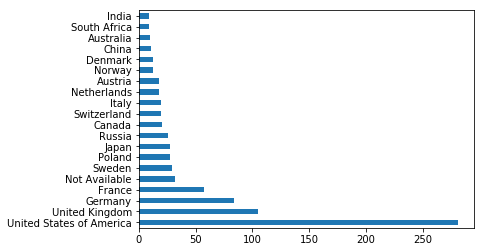

In [200]:
a = df[ 'birth_country_current'].value_counts().sort_values(ascending=False).head(20)
a.plot(kind = 'barh')

In [215]:
df_countries = df.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale='Mint')
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()


In [204]:
country_city_org = df.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()